<a href="https://colab.research.google.com/github/lucasfreire01/Clothes_pixels/blob/main/Roupa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
#import datasets
train = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv', sep=',')
test = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv', sep=',')

In [ ]:
#Converting the type of datasets to float 32 becomning the train and test dataset more computationally cheap
train = np.array(train, dtype='float32')
test = np.array(test, dtype='float32')

In [ ]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

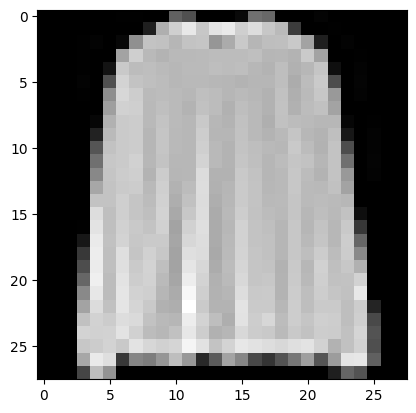

In [ ]:
#Plot a random figure
i = random.randint(1, 60000)
plt.imshow(train[i, 1:].reshape([28, 28]))
plt.imshow(train[i, 1:].reshape([28, 28]), cmap='gray')

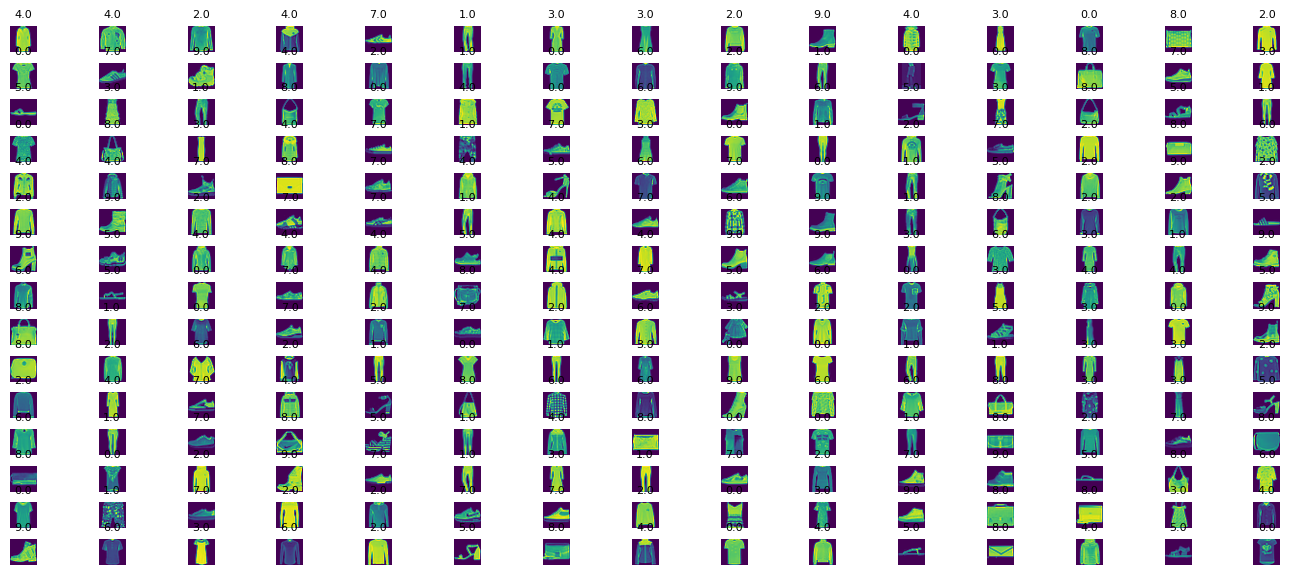

In [ ]:
#See a range of outfits in the dataset
w_grid = 15
l_grid = 15
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17, 7))
axes = axes.ravel()
a_train = len(train)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, a_train)
  axes[i].imshow(train[index, 1:].reshape((28,28)))
  axes[i].set_title(train[index,0], fontsize= 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
#Split these datasets in x_tran, x_test, y_train, y_test
x_train = train[:, 1:] /255
y_train = train[:, 0]

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_test = test[:, 1:] /255
y_test = test[:, 0]

In [ ]:
x_train = x_train.reshape(x_train.shape[0], * (28, 28, 1))
x_test = x_test.reshape(x_test.shape[0], * (28, 28, 1))

In [ ]:
#We going to creat a model with a conv2d because we're working with images and the MaxPooling we reduciong the dimetion of the matrix
from tensorflow.keras import layers, models
cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
cnn.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'Adam', metrics= ['accuracy'])

In [ ]:
epochs = 150
hsitory = cnn.fit(x_train, y_train, batch_size=512, epochs=epochs)

Epoch 1/150
118/118 [==============================] - 53s 440ms/step - loss: 0.8319 - accuracy: 0.7067
Epoch 2/150
118/118 [==============================] - 53s 446ms/step - loss: 0.4766 - accuracy: 0.8256
Epoch 3/150
118/118 [==============================] - 53s 448ms/step - loss: 0.4095 - accuracy: 0.8531
Epoch 4/150
118/118 [==============================] - 51s 435ms/step - loss: 0.3684 - accuracy: 0.8691
Epoch 5/150
118/118 [==============================] - 51s 435ms/step - loss: 0.3431 - accuracy: 0.8765
Epoch 6/150
118/118 [==============================] - 51s 436ms/step - loss: 0.3208 - accuracy: 0.8849
Epoch 7/150
118/118 [==============================] - 52s 438ms/step - loss: 0.3078 - accuracy: 0.8910
Epoch 8/150
118/118 [==============================] - 51s 434ms/step - loss: 0.2921 - accuracy: 0.8949
Epoch 9/150
118/118 [==============================] - 51s 436ms/step - loss: 0.2773 - accuracy: 0.9011
Epoch 10/150
118/118 [==============================] - 59s 499m

In [ ]:
#See the evaluation of model
evaluation = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 5s 11ms/step - loss: 0.7189 - accuracy: 0.9185


In [ ]:
evaluation

[0.718899667263031, 0.9185000061988831]

In [ ]:
#Take the predict values
predict = cnn.predict(x_test)
predicted_class = np.argmax(predict, axis=1)

313/313 [==============================] - 5s 16ms/step


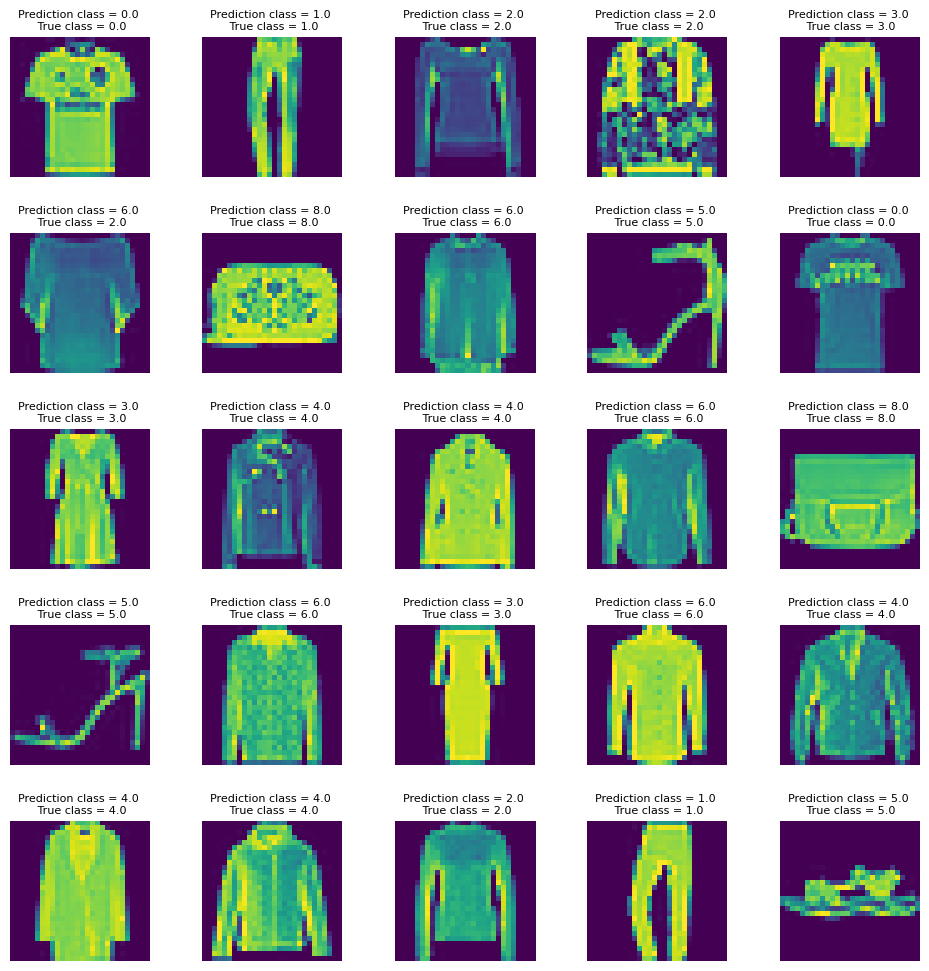

In [ ]:
#See the results and croos with real values of the dataset
w_grid = 5
l_grid = 5
fig, axes = plt.subplots(l_grid, w_grid, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, a_train)
  axes[i].imshow(x_test[i].reshape((28,28)))
  axes[i].set_title('Prediction class = {:0.1f} \n True class = {:0.1f}'.format(predicted_class[i], y_test[i]), fontsize= 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

<Axes: >

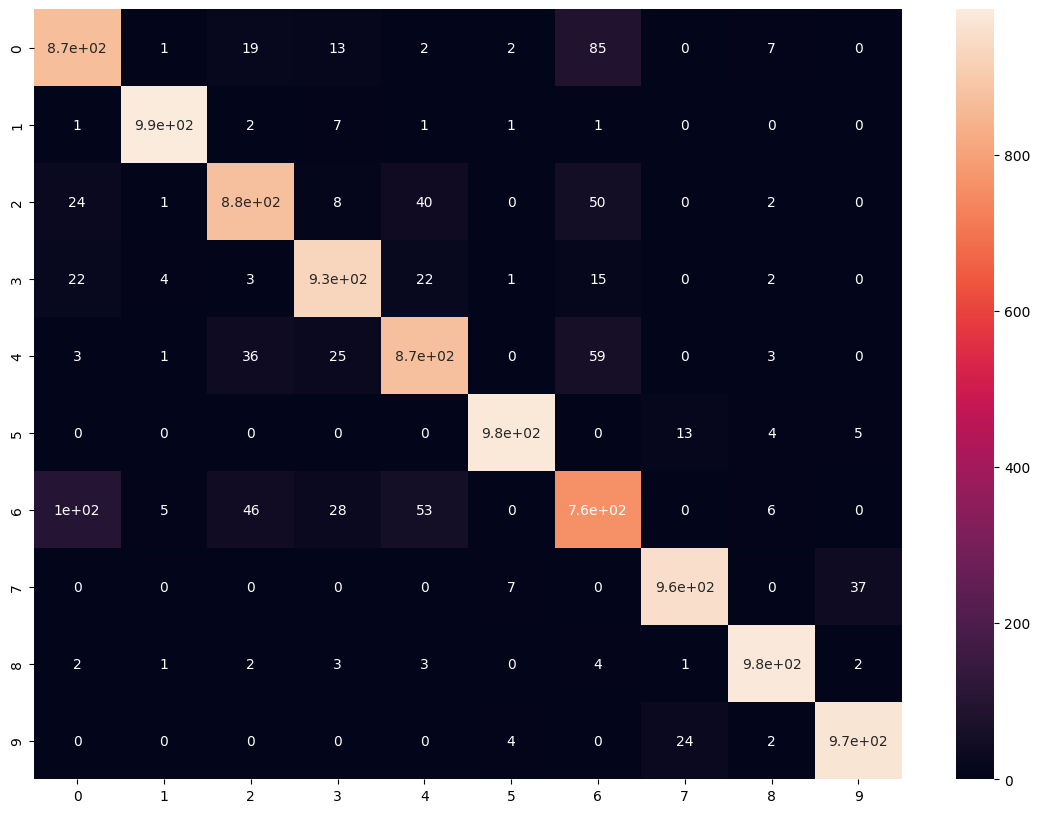

In [ ]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, predicted_class)
plt.figure(figsize=(14,10))
sns.heatmap(cn, annot=True)

In [ ]:
cn

array([[871,   1,  19,  13,   2,   2,  85,   0,   7,   0],
       [  1, 987,   2,   7,   1,   1,   1,   0,   0,   0],
       [ 24,   1, 875,   8,  40,   0,  50,   0,   2,   0],
       [ 22,   4,   3, 931,  22,   1,  15,   0,   2,   0],
       [  3,   1,  36,  25, 873,   0,  59,   0,   3,   0],
       [  0,   0,   0,   0,   0, 978,   0,  13,   4,   5],
       [100,   5,  46,  28,  53,   0, 762,   0,   6,   0],
       [  0,   0,   0,   0,   0,   7,   0, 956,   0,  37],
       [  2,   1,   2,   3,   3,   0,   4,   1, 982,   2],
       [  0,   0,   0,   0,   0,   4,   0,  24,   2, 970]])

In [ ]:
from sklearn.metrics import classification_report
num = 10
target = ['class {}'.format(i) for i in range(num)]
target

['class 0',
 'class 1',
 'class 2',
 'class 3',
 'class 4',
 'class 5',
 'class 6',
 'class 7',
 'class 8',
 'class 9']

In [ ]:
print(classification_report(y_test, predicted_class, target_names=target))

              precision    recall  f1-score   support

     class 0       0.85      0.87      0.86      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.89      0.88      0.88      1000
     class 3       0.92      0.93      0.92      1000
     class 4       0.88      0.87      0.88      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.78      0.76      0.77      1000
     class 7       0.96      0.96      0.96      1000
     class 8       0.97      0.98      0.98      1000
     class 9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

